In [1]:
import os
import sys

import pandas as pd
import numpy as np

import networkx as nx

from basicmemnet import memnet
from basicmemnet import plot_graph

from pykeen.triples import TriplesFactory
from pykeen.pipeline import pipeline

### Prepare data - put it into appropriate format for Pykeen

In [2]:
def get_triplets(G):
    triples = []
    for u, v, data in G.edges(data=True):
        relation = data.get('link_type')
        head = G.nodes[u].get('utterances')[0]
        tail = G.nodes[v].get('utterances')[0]
        triples.append([head, relation, tail])
    return np.array(triples)


In [3]:
md_train = memnet.DSL()
md_test = memnet.DSL()

md_train.import_gml("train_graph.gml")
md_test.import_gml("test_graph.gml")

test = md_test.get_graph()
train = md_train.get_graph()

train_triplets = get_triplets(train)
test_triplets = get_triplets(test)

In [4]:
print('Number of train triplets: ', len(train_triplets))
print('Number of test triplets: ',len(test_triplets))

Number of train triplets:  25897
Number of test triplets:  6680


In [5]:
train_triples_factory = TriplesFactory.from_labeled_triples(train_triplets)
test_triples_factory = TriplesFactory.from_labeled_triples(test_triplets)

### Train model and save results

In [8]:
# Model will be trained on the whole test set, but evaluation will be made only for 'has_element' link, 
# because we want to predictions for the parent actions.
 
results = pipeline(
    training=train_triples_factory,
    testing=test_triples_factory,
    model='TransE',
    epochs=250,  
    evaluation_relation_whitelist = {'has_element'} 
)
results.save_to_directory('doctests/utterances_transe_250epochs_parentAction')

INFO:pykeen.triples.triples_factory:keeping 1/4 (25.00%) relations.
INFO:pykeen.triples.triples_factory:keeping 67/254 (26.38%) triples.
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cpu:   0%|          | 0/250 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/2 [00:00<?, ?batch/s]

Evaluating on cpu:   0%|          | 0.00/67.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=41, num_relations=4, create_inverse_triples=False, num_triples=276) to file:///C:/Users/maria/Downloads/MA_Thesis/Knowledge_Refinement_1/doctests/utterances_transe_250epochs_parentAction/training_triples
INFO:pykeen.pipeline.api:Saved to directory: C:\Users\maria\Downloads\MA_Thesis\Knowledge_Refinement_1\doctests\utterances_transe_250epochs_parentAction


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

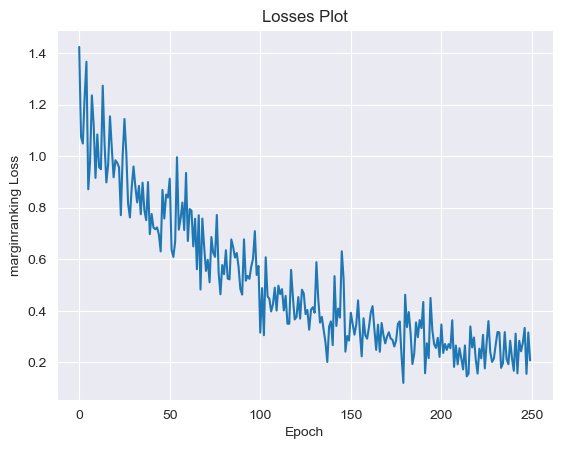

In [10]:
from pykeen.pipeline import plot_losses

plot_losses(results)

### Make a single prediction

In [12]:
from pykeen.predict import predict_target

In [19]:
sub_actions = ['idle', 'approach', 'lift', 'stir', 'place', 'retreat', 'hold', 
               'pour', 'drink', 'wipe', 'cut', 'screw', 'hammer', 'saw']

pred = predict_target(
    model=results.model,
    relation="has_element",
    tail = 'cut',
    triples_factory=test_triples_factory,
)

In [20]:
pred

TargetPredictions(df=    head_id      score                   head_label
6         6  -8.009609                          cut
33       33  -8.807360             task_5_k_cereals
36       36  -8.948142           task_8_w_hammering
34       34  -8.984665          task_6_w_hard_drive
31       31  -8.990544             task_3_k_pouring
35       35  -9.165115     task_7_w_free_hard_drive
28       28  -9.170157                    subject_6
30       30  -9.274673  task_2_k_cooking_with_bowls
24       24  -9.539301                    subject_2
26       26  -9.599762                    subject_4
29       29  -9.632506             task_1_k_cooking
32       32  -9.634078              task_4_k_wiping
21       21  -9.703568                       sponge
22       22  -9.704998                         stir
37       37  -9.803617              task_9_w_sawing
3         3  -9.827904                         bowl
27       27  -9.999395                    subject_5
13       13 -10.134969                     

In [29]:
pred.df['head_label'].iloc[1]

'task_5_k_cereals'